In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.cluster

In [57]:
outliers1 = pd.read_csv("outliers1.csv", header=None).to_numpy()
outliers2 = pd.read_csv("outliers2.csv", header=None).to_numpy()
housing = pd.read_csv("housing.csv", header=None).to_numpy()

In [58]:
# mean of ouliers1
print(np.mean(outliers1))
print(np.std(outliers2))

0.46625479284871996
2.987690678341305


In [67]:
# How may values outside of 2 standard deviations?
print(np.sum(np.abs(outliers1 - np.mean(outliers1)) > 2 * np.std(outliers1)))

# print the outliers
print(outliers1[np.abs(outliers1 - np.mean(outliers1)) > 2 * np.std(outliers1)])

3
[ 9.68233704 -6.72280811 -6.31340127]


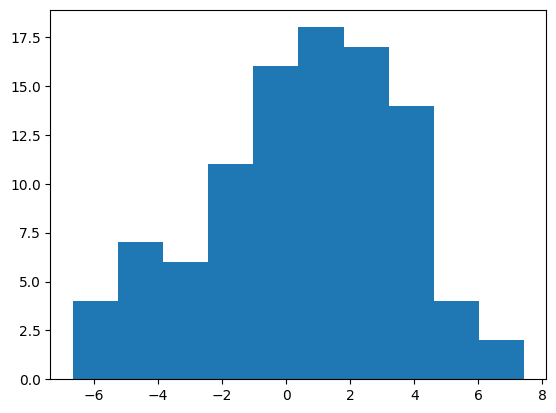

In [38]:
# Plot the outliers2.csv data using a Histogram. Try to define the bins so that the identified outlier values are separated from the rest of the values.
plt.hist(outliers2, bins=10);

In [59]:
# Show medians, 25th and 75th percentiles
print(np.median(outliers1))
print(np.quantile(outliers1, 0.25))
print(np.quantile(outliers1, 0.75))

0.7133544507445597
-2.057487607621856
2.5517907927073624


In [68]:
# Values between the 25th and 75th percentile (the interquartile range - IQR) represents 50% of the data. Values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile are generally considered outliers from the distribution of data.
# How many data points are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile?
q1 = np.quantile(outliers1, 0.25)
q3 = np.quantile(outliers1, 0.75)
print(q1, q3)
iqr = q3 - q1
print(np.sum(outliers1 < q1 - 1.5 * iqr) + np.sum(outliers1 > q3 + 1.5 * iqr))


# Print the values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile.
print(outliers1[outliers1 < q1 - 1.5 * iqr])


-2.057487607621856 2.5517907927073624
1
[]


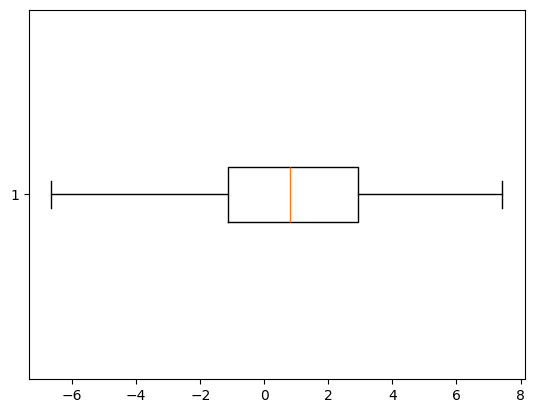

In [70]:
# Plot the outliers1.csv data using a Box and Whiskers chart. Try to define the chart parameters so that the identified outlier values are separated from the rest of the values.

plt.boxplot(outliers2, vert=False, whis=1.5);

In [76]:
# Create a new dataset where outliers1.csv is the first feature, and outliers2.csv is the second feature.

outliers = np.hstack((outliers1, outliers2))
outliers[99]

array([-2.32381496,  1.96471188])

In [87]:
# We can use the same approach to detect outliers while skipping the clustering. To start off, make a distance matrix that measures the Euclidean distance between each pair of samples.

distances = sklearn.metrics.pairwise_distances(outliers)
distances[59, 4]

7.450605843410862

In [105]:
# Count the number of points with no neighbors within a distance of 5
np.sum(distances >= 5, axis=1) == 99

# get the index of the points with no neighbors within a distance of 5
np.where(np.sum(distances >= 5, axis=1) == 99)

outliers[28]

array([ 9.68233704, -2.9583245 ])

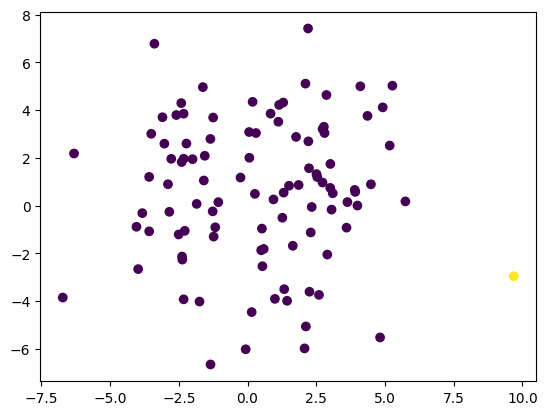

In [107]:
#scatterplot, use a colored marker for the outliers
plt.scatter(outliers[:, 0], outliers[:, 1], c=np.sum(distances >= 5, axis=1) == 99);

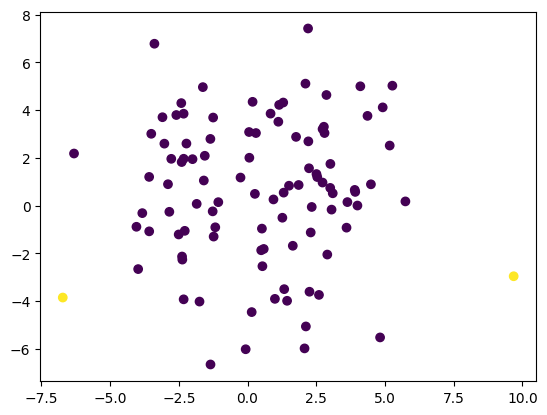

In [114]:
# calculate the number of points that have 2 or fewer neighbors within a distance of 4
np.where(np.sum(distances >= 4, axis=1) >= 97)
outliers[49]
plt.scatter(outliers[:, 0], outliers[:, 1], c=np.sum(distances >= 4, axis=1) >= 97);

[[ 2.20156789  7.42361623]
 [ 9.68233704 -2.9583245 ]
 [ 4.82200103 -5.52202731]
 [-3.38834457  6.78454905]
 [-6.72280811 -3.8508669 ]
 [-6.31340127  2.18430966]]


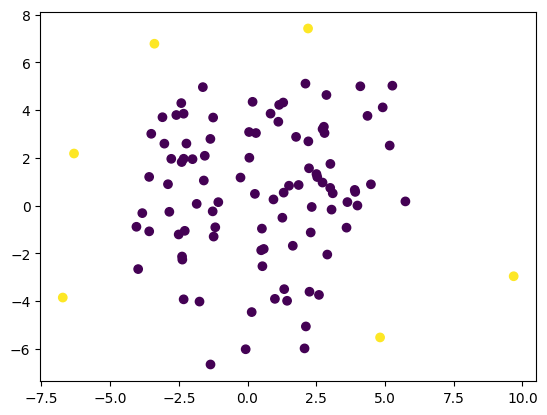

In [117]:
# calculate the number of points that have 2 or fewer neighbors within a distance of 4
vals = np.where(np.sum(distances >= 3, axis=1) >= 96)
for i in vals:
    print(outliers[i])
plt.scatter(outliers[:, 0], outliers[:, 1], c=np.sum(distances >= 3, axis=1) >= 96);

In [119]:
# Perform k-means clustering with a distance threshold of 5
kmeans = sklearn.cluster.KMeans(n_clusters=2)
kmeans.fit(outliers)
kmeans.labels_
plt.scatter(outliers[:, 0], outliers[:, 1], c=kmeans.labels_);

AttributeError: module 'sklearn' has no attribute 'cluster'

In [51]:
# Show difference of column 6 from raw and labeled
raw_6 = raw.iloc[:,6].values
labeled_6 = labeled.iloc[:,6].values

# show all values that are different
for i in range(len(raw_6)):
    if raw_6[i] != labeled_6[i]:
        print(i, raw_6[i], labeled_6[i])

20 3. 3
24 8. 8
34 4. 4
40 4. 4
45 8. 8
46 5. 5
56 5. 5
60 6. 6
75 0. 0
89 4. 4
93 2. 2


In [65]:
# Show difference of column 6 from raw and labeled
raw_6 = raw.iloc[:,0].values
labeled_6 = labeled.iloc[:,0].values

diff = []

# add all different values to array
for i in range(len(raw_6)):
    if raw_6[i] != labeled_6[i]:
        print(i, raw_6[i], labeled_6[i])
        diff.append(i)


82 2006E194 2.01E+197
